In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.getcwd().split('notebook_examples')[0] + 'emergent-colocation'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import geopandas as gpd
import colocation
import utils

/home/andrew/anaconda3/envs/colocationv2/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
data = pd.read_csv('../../data/Minneapolis_emergent.csv')

In [4]:
data.head(5)

,placekey,parent_placekey,location_name,safegraph_brand_ids,brands,top_category,sub_category,naics_code,latitude,longitude,...,region,postal_code,iso_country_code,phone_number,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,geometry_type
0,225-222@5s8-cd6-73q,NaN,United States Postal Service (USPS),SG_BRAND_27ee73cd1fb6f5e432852fea401eacce,United States Postal Service (USPS),Postal Service,Postal Service,491110,44.978169,-93.263394,...,MN,55415,US,1.612333e+10,"{ ""Mon"": [[""9:00"", ""17:00""]], ""Tue"": [[""9:00"",...",NaN,NaN,NaN,2019-07-01,POLYGON
1,zzw-224@5s8-cd4-hbk,NaN,CrossFit,SG_BRAND_ae6abf1aa02c01cfe560b9315db66b07,CrossFit,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,713940,44.979136,-93.292699,...,MN,55405,US,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON
2,228-223@5s8-cj9-bkz,NaN,Cricket Wireless,SG_BRAND_247184f5fcf8c0afea1291676dc6df8f,Cricket Wireless,Wired and Wireless Telecommunications Carriers,Wireless Telecommunications Carriers (except S...,517312,44.948966,-93.262887,...,MN,55407,US,1.612224e+10,"{ ""Mon"": [[""10:00"", ""19:00""]], ""Tue"": [[""10:00...",NaN,NaN,NaN,2019-07-01,POLYGON
3,zzw-224@5s8-cdb-d7q,NaN,AutoZone,SG_BRAND_87681bc51c663efbbf7272e0f1262e9b,AutoZone,"Automotive Parts, Accessories, and Tire Stores",Automotive Parts and Accessories Stores,441310,44.998359,-93.286112,...,MN,55411,US,1.612529e+10,"{ ""Mon"": [[""7:30"", ""22:00""]], ""Tue"": [[""7:30"",...",NaN,NaN,NaN,2019-07-01,POLYGON
4,224-222@5s8-cj8-8gk,NaN,McDonald's,SG_BRAND_5179b21fc1d50950b99b4eecaa48c614,McDonald's,Restaurants and Other Eating Places,Limited-Service Restaurants,722513,44.948583,-93.273703,...,MN,55408,US,1.612826e+10,"{ ""Mon"": [[""7:00"", ""23:00""]], ""Tue"": [[""7:00"",...","Counter Service,Lunch,Fast Food,Drive Through,...",NaN,NaN,2019-07-01,POLYGON


In [5]:
data = data[(data['brands'] != '')&(data['top_category'] == 'Restaurants and Other Eating Places')]
data['pos'] = gpd.points_from_xy(data.longitude, data.latitude)
data = data.sort_values(by='opened_on')
new_locations = data[~data['opened_on'].isna()]
old_locations = data[data['opened_on'].isna()]

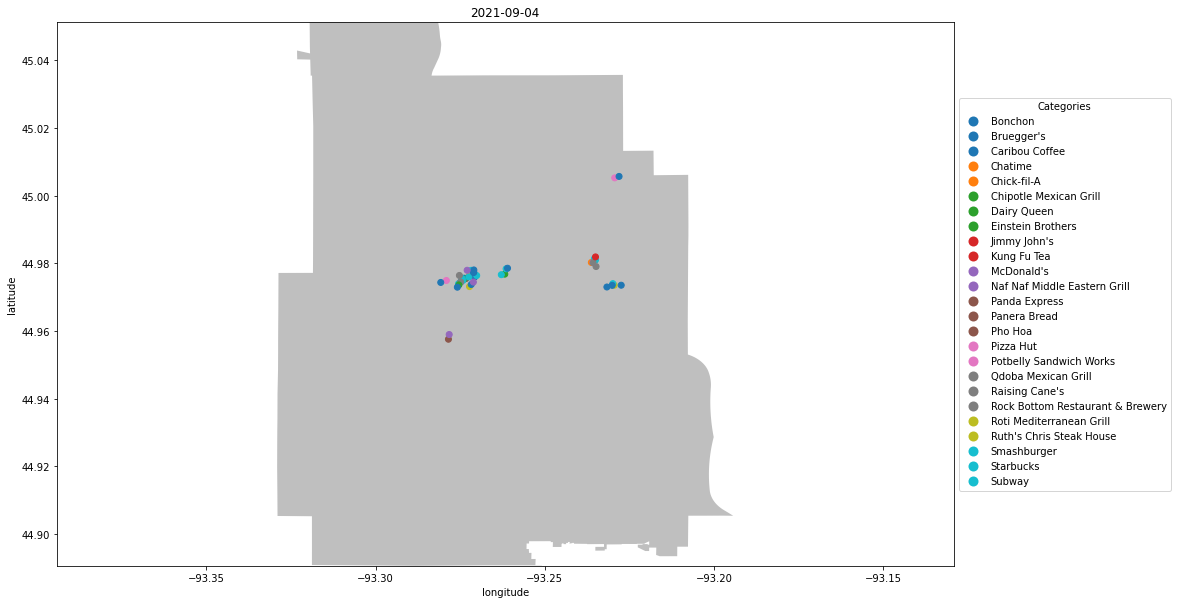

In [6]:
T,R = colocation.emergent(data, new_locations, 'pos', 'brands', 'placekey', 'opened_on', threshold=100, old_events=old_locations, alpha=0.75,
                            plot=True, out_plot='out_plot/test_events', out_csv='out_csv', shape_file='PolyMN/Polygon_MN.shp', gif=True)

In [7]:
# print all emergent colocation rules
out = []
for r in R:
    out.append(str(r))

for r in sorted(out):
    print(r)

Bonchon => Chatime, Cascade Participation Index: 1.0
Bonchon => Jimmy John's, Cascade Participation Index: 1.0
Bonchon => Kung Fu Tea, Cascade Participation Index: 1.0
Bonchon => Potbelly Sandwich Works, Cascade Participation Index: 1.0
Bonchon => Qdoba Mexican Grill, Cascade Participation Index: 1.0
Bonchon => Raising Cane's, Cascade Participation Index: 1.0
Bonchon => Starbucks, Cascade Participation Index: 1.0
Bonchon => Subway, Cascade Participation Index: 1.0
Einstein Brothers => Caribou Coffee, Cascade Participation Index: 1.0
Einstein Brothers => Starbucks, Cascade Participation Index: 1.0
Einstein Brothers => Subway, Cascade Participation Index: 1.0
Panda Express => Chick-fil-A, Cascade Participation Index: 1.0
Panda Express => Panda Express, Cascade Participation Index: 1.0
Panda Express => Smashburger, Cascade Participation Index: 1.0
Panera Bread => Caribou Coffee, Cascade Participation Index: 1.0
Panera Bread => Naf Naf Middle Eastern Grill, Cascade Participation Index: 1.0

In [8]:
# look at some of the prevalent colocations
final = T[list(T.keys())[-1]]
final.sample(10)

,new_cat,new_id,new_pos,old_cat,old_id,old_pos
163,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Starbucks,226-227@5s8-cd6-fmk,POINT (-93.27246 44.97595)
163,Potbelly Sandwich Works,zzy-22b@5s8-cd6-fs5,POINT (-93.27250 44.97613),Starbucks,226-227@5s8-cd6-fmk,POINT (-93.27246 44.97595)
203,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Caribou Coffee,zzw-22d@5s8-cd6-fvf,POINT (-93.27098 44.97802)
83,Pho Hoa,zzw-222@5s8-cj9-gp9,POINT (-93.27849 44.95755),McDonald's,227-222@5s8-cj9-gff,POINT (-93.27826 44.95895)
35,Roti Mediterranean Grill,229-224@5s8-cks-2ff,POINT (-93.22949 44.97352),Starbucks,zzy-222@5s8-cks-2c5,POINT (-93.22989 44.97398)
91,Potbelly Sandwich Works,zzy-22b@5s8-cd6-fs5,POINT (-93.27250 44.97613),Subway,226-222@5s8-cd6-hyv,POINT (-93.27450 44.97553)
24,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Caribou Coffee,zzw-22s@5s8-cd6-hyv,POINT (-93.27387 44.97559)
84,Panda Express,zzy-22h@5s8-cjc-8d9,POINT (-93.20571 44.88196),Chick-fil-A,229-222@5s8-cjc-ch5,POINT (-93.20463 44.88251)
163,Panera Bread,zzw-226@5s8-cd6-fs5,POINT (-93.27331 44.97549),Starbucks,226-227@5s8-cd6-fmk,POINT (-93.27246 44.97595)
173,Panera Bread,zzw-226@5s8-cd6-fs5,POINT (-93.27331 44.97549),Naf Naf Middle Eastern Grill,228-223@5s8-cd6-gc5,POINT (-93.27112 44.97444)


In [9]:
# see what new events have colocations
final['new_cat'].unique()

array(['Potbelly Sandwich Works', "Ruth's Chris Steak House",
       'Einstein Brothers', 'Panda Express', 'Pizza Hut', 'Bonchon',
       'Roti Mediterranean Grill', 'Starbucks', 'Pho Hoa', 'Panera Bread'],
      dtype=object)

In [10]:
# let's look at the emergent colocations for Roti Mediterranean Grill
final[final['new_cat'] == 'Roti Mediterranean Grill']

,new_cat,new_id,new_pos,old_cat,old_id,old_pos
7,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Caribou Coffee,226-222@5s8-cd6-gp9,POINT (-93.27073 44.97595)
24,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Caribou Coffee,zzw-22s@5s8-cd6-hyv,POINT (-93.27387 44.97559)
62,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Subway,zzw-22r@5s8-cd6-fvf,POINT (-93.27178 44.97791)
77,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Starbucks,222-222@5s8-cd6-hyv,POINT (-93.27420 44.97493)
91,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Subway,226-222@5s8-cd6-hyv,POINT (-93.27450 44.97553)
123,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Subway,222-224@5s8-cd6-gp9,POINT (-93.27013 44.97637)
143,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Bruegger's,23m-222@5s8-cd6-fxq,POINT (-93.27101 44.97744)
163,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Starbucks,226-227@5s8-cd6-fmk,POINT (-93.27246 44.97595)
173,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Naf Naf Middle Eastern Grill,228-223@5s8-cd6-gc5,POINT (-93.27112 44.97444)
178,Roti Mediterranean Grill,226-22g@5s8-cd6-fmk,POINT (-93.27244 44.97616),Caribou Coffee,228-225@5s8-cd6-fxq,POINT (-93.27105 44.97725)


In [11]:
for r in sorted(out):
    if r.startswith('Roti Mediterranean Grill'):
        print(r)

Roti Mediterranean Grill => Bruegger's, Cascade Participation Index: 1.0
Roti Mediterranean Grill => Caribou Coffee, Cascade Participation Index: 1.0
Roti Mediterranean Grill => Starbucks, Cascade Participation Index: 1.0


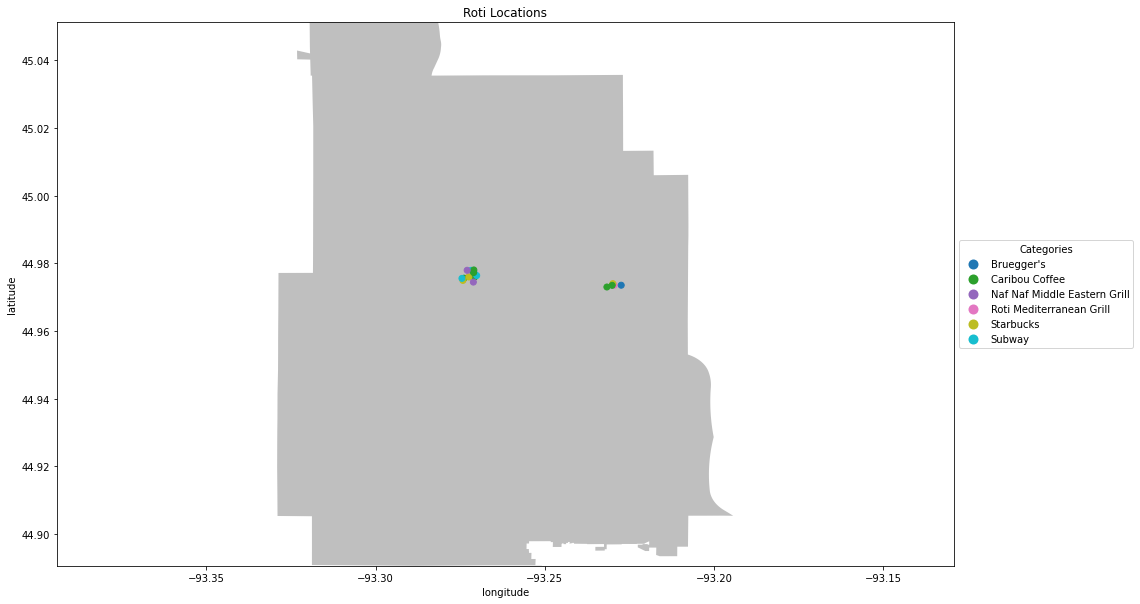

In [12]:
last_plot = utils.plot_emergent(gpd.GeoDataFrame(data, geometry='pos'), final[final['new_cat']=='Roti Mediterranean Grill'], 'brands', 'placekey', 'Roti Locations', 'PolyMN/Polygon_MN.shp')